In [9]:
import astropy.units as u
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
from tdsat_telescope import load_qe, load_reflectivity
from duet_filters import optimize_filter, make_red_filter
from apply_transmission import apply_trans
from zodi import load_airglow, load_zodi
import astropy.units as u

In [11]:
target = 0.5

/Users/bwgref/anaconda/lib/python3.5/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


Target out-of-band 0.00025129941504558776
0.5000101164352329


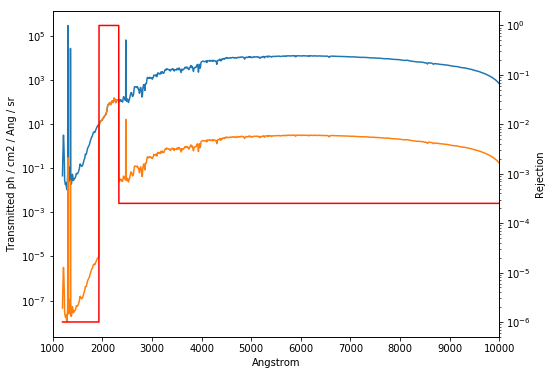

In [17]:
# Band 1
zodi = load_zodi(scale=77)
low_wave = 193*u.nm
high_wave = 233*u.nm
rejection = optimize_filter(low_wave, high_wave, blue_filter=True, target_ratio=target)
print('Target out-of-band {}'.format(rejection))
ref_wave, reflectivity = load_reflectivity()
qe_wave, qe = load_qe()
red_filter = make_red_filter(zodi['wavelength'], low_wave = low_wave,
                             high_wave=high_wave, rejection = rejection,
                             blue_filter=True)
#     # Apply reflectivity
red_flux = apply_trans(zodi['wavelength'], zodi['flux'], ref_wave, reflectivity/100.)
qe_flux = apply_trans(zodi['wavelength'], ref_flux, qe_wave, qe)
band_flux = apply_trans(zodi['wavelength'], qe_flux, zodi['wavelength'], red_filter)


in_band = band_flux[(zodi['wavelength'] > low_wave) &
                   (zodi['wavelength']<high_wave)].sum()

out_of_band = band_flux[((zodi['wavelength'] < low_wave) |
                        (zodi['wavelength']>high_wave)) & 
                       (zodi['wavelength'] < 1*u.micron)].sum()
print(out_of_band / in_band)

fig = plt.figure(figsize = (8, 6))
ax = fig.subplots()

ax.set_yscale('Log')
ax.plot(zodi['wavelength'], qe_flux)
ax.plot(zodi['wavelength'], band_flux)


ax.set_xlabel(zodi['wavelength'].unit)
ax.set_ylabel('Transmitted ph / cm2 / Ang / sr')


ax.set_xlim([1e3, 10e3])


ax2 = ax.twinx()
ax2.plot(zodi['wavelength'], red_filter, color = 'red')
ax2.set_yscale('Log')
ax2.set_ylabel('Rejection')


plt.show()


/Users/bwgref/anaconda/lib/python3.5/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


Target out-of-band 0.0023032466301754783
0.5000000000000001


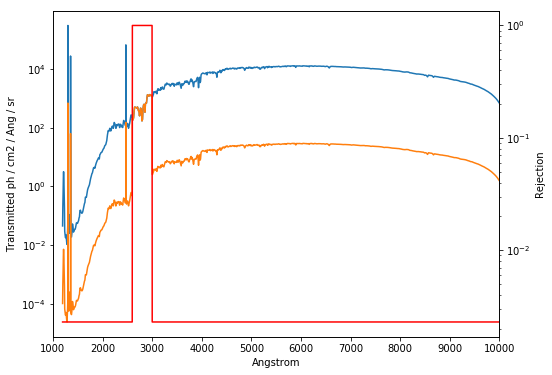

In [18]:
# Band 1
zodi = load_zodi(scale=77)
low_wave = 260*u.nm
high_wave = 300*u.nm
rejection = optimize_filter(low_wave, high_wave, blue_filter=False, target_ratio=target)
print('Target out-of-band {}'.format(rejection))


ref_wave, reflectivity = load_reflectivity()
qe_wave, qe = load_qe()
red_filter = make_red_filter(zodi['wavelength'], low_wave = low_wave,
                             high_wave=high_wave, rejection = rejection,
                             blue_filter=False)
#     # Apply reflectivity
ref_flux = apply_trans(zodi['wavelength'], zodi['flux'], ref_wave, reflectivity/100.)
qe_flux = apply_trans(zodi['wavelength'], ref_flux, qe_wave, qe)
band_flux = apply_trans(zodi['wavelength'], qe_flux, zodi['wavelength'], red_filter)


in_band = band_flux[(zodi['wavelength'] > low_wave) &
                   (zodi['wavelength']<high_wave)].sum()

out_of_band = band_flux[((zodi['wavelength'] < low_wave) |
                        (zodi['wavelength']>high_wave)) & 
                       (zodi['wavelength'] < 1*u.micron)].sum()
print(out_of_band / in_band)

fig = plt.figure(figsize = (8, 6))
ax = fig.subplots()

ax.set_yscale('Log')
ax.plot(zodi['wavelength'], qe_flux)
ax.plot(zodi['wavelength'], band_flux)


ax.set_xlabel(zodi['wavelength'].unit)
ax.set_ylabel('Transmitted ph / cm2 / Ang / sr')


ax.set_xlim([1e3, 10e3])


ax2 = ax.twinx()
ax2.plot(zodi['wavelength'], red_filter, color = 'red')
ax2.set_yscale('Log')
ax2.set_ylabel('Rejection')




plt.show()

